<a href="https://colab.research.google.com/github/Tej1109/MLP_Pracs/blob/main/Tejas_MLP_Prac8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install pyclustering


In [26]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target  # only for evaluation/visualization

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y


In [27]:
df.info()
df.describe()
df['target'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,count
target,
0,50
1,50
2,50


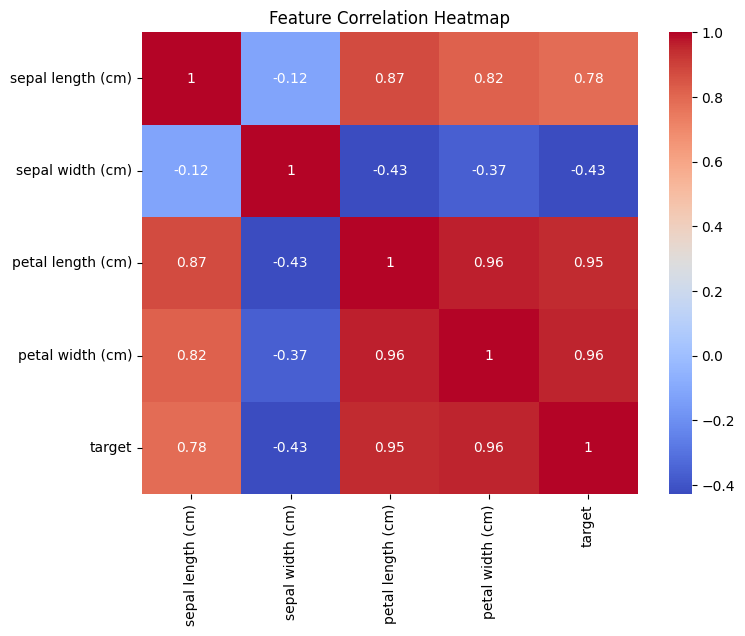

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)


In [31]:
from pyclustering.cluster.kmedoids import kmedoids
import numpy as np

initial_medoids = [0, 50, 100]  # choose 3 points as starting medoids
kmedoids_instance = kmedoids(X_scaled, initial_medoids)
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
labels_kmedoids = np.zeros(len(X_scaled))
for idx, cluster in enumerate(clusters):
    labels_kmedoids[cluster] = idx


In [32]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier = hier.fit_predict(X_scaled)


In [33]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=5)  # tune eps for better results
labels_dbscan = dbscan.fit_predict(X_scaled)


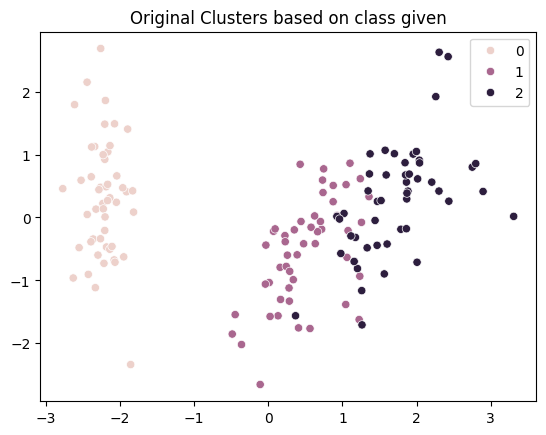

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1],hue = y)
plt.title("Original Clusters based on class given")

def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=labels, palette='Set1', s=60)
    plt.title(title)
    plt.show()

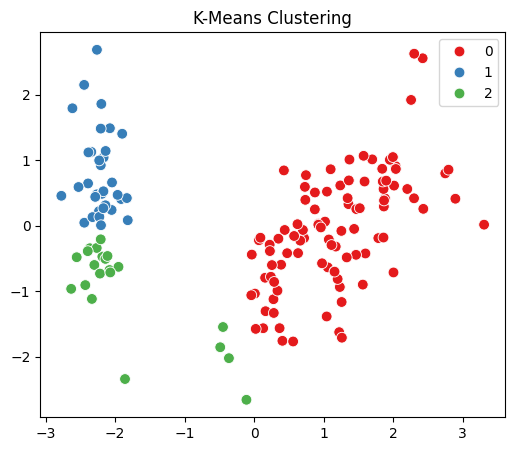

In [41]:
plot_clusters(X_pca, labels_kmeans, 'K-Means Clustering')

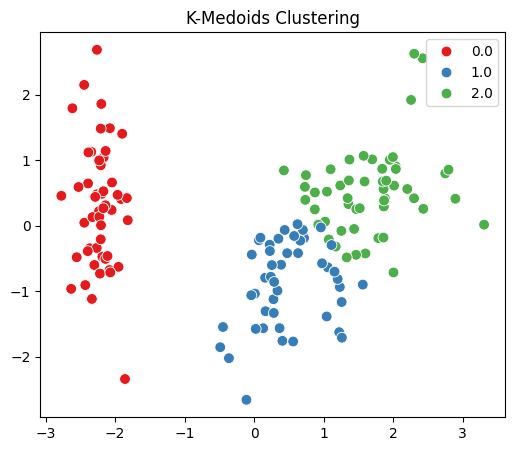

In [42]:
plot_clusters(X_pca, labels_kmedoids, 'K-Medoids Clustering')


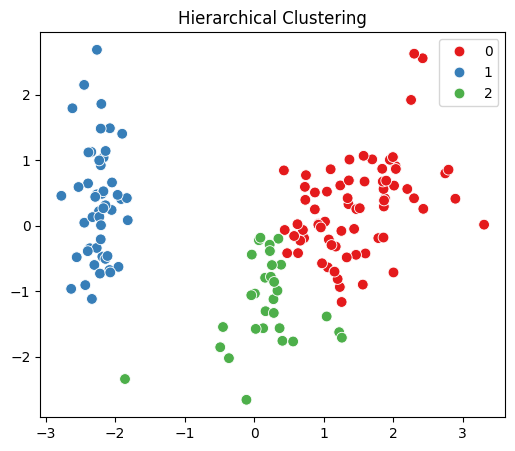

In [43]:
plot_clusters(X_pca, labels_hier, 'Hierarchical Clustering')



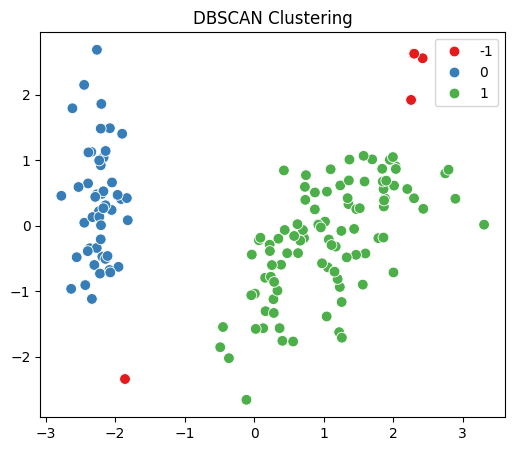

In [44]:
plot_clusters(X_pca, labels_dbscan, 'DBSCAN Clustering')